# Estudio descriptivo y depuración del archivo de venta de viviendas

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Cargar las funciones
exec(open(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MINERÍA DE DATOS Y MODELACIÓN ejercicios\2. Ejercicio base datos vivienda\NuestrasFunciones.py').read())

In [4]:
# Lectura de datos
viviendas = pd.read_excel(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MINERÍA DE DATOS Y MODELACIÓN ejercicios\2. Ejercicio base datos vivienda\VentaViviendas.xlsx')
viviendas.head()

,year,month,price,Luxury,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,basement,yr_built,yr_renovated,lat,long
0,2014,7,653450,1,3,2.5,2070,-1,1.0,0,0,C,1540,1,1980,0,47.5936,-122.013
1,2014,6,710000,1,2,1.5,1640,-1,1.5,0,0,A,1540,1,1916,0,47.6624,-122.325
2,2014,10,780000,1,4,3.5,3720,-1,1.0,0,1,B,3720,0,2007,0,47.3216,-121.940
3,2014,12,795000,1,3,3.5,2260,-1,2.0,0,0,B,1880,1,2003,0,47.6422,-122.361
4,2014,10,399950,0,3,2.0,2050,-1,1.0,0,0,A,1170,1,1960,0,47.7447,-122.328


## Análisis descriptivo

**Análisis descriptivo para determinar si existen errores en las variables (valores mal codificados, valores fuera de rango, categorías con poca representación, simetría y curtosis de las variables cuantitativas, etc.).**

In [5]:
# Información del dataset
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5000 non-null   int64  
 1   month         5000 non-null   int64  
 2   price         5000 non-null   int64  
 3   Luxury        5000 non-null   int64  
 4   bedrooms      5000 non-null   int64  
 5   bathrooms     5000 non-null   float64
 6   sqft_living   5000 non-null   int64  
 7   sqft_lot      5000 non-null   int64  
 8   floors        5000 non-null   float64
 9   waterfront    5000 non-null   int64  
 10  view          5000 non-null   int64  
 11  condition     5000 non-null   object 
 12  sqft_above    5000 non-null   int64  
 13  basement      5000 non-null   int64  
 14  yr_built      5000 non-null   int64  
 15  yr_renovated  5000 non-null   int64  
 16  lat           5000 non-null   float64
 17  long          5000 non-null   float64
dtypes: float64(4), int64(13), ob

In [6]:
viviendas.describe().round(2)

,year,month,price,Luxury,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,basement,yr_built,yr_renovated,lat,long
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.0,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,2014.32,6.59,544129.10,0.42,3.62,2.14,2077.38,13732.48,1.50,-0.01,0.1,1784.90,0.39,1971.08,86.16,47.56,-122.21
std,0.47,3.12,372986.94,0.49,3.71,0.87,916.48,37581.44,0.54,0.17,0.3,824.33,0.49,29.24,405.52,0.14,0.14
min,2014.00,1.00,86500.00,0.00,0.00,0.00,370.00,-1.00,1.00,-1.00,0.0,370.00,0.00,1900.00,0.00,47.16,-122.50
25%,2014.00,4.00,324937.50,0.00,3.00,1.50,1410.00,4500.00,1.00,0.00,0.0,1190.00,0.00,1951.00,0.00,47.48,-122.33
50%,2014.00,6.00,451000.00,0.00,3.00,2.50,1910.00,7312.00,1.50,0.00,0.0,1550.00,0.00,1975.00,0.00,47.57,-122.23
75%,2015.00,9.00,645000.00,1.00,4.00,2.50,2560.00,10284.25,2.00,0.00,0.0,2220.00,1.00,1996.00,0.00,47.68,-122.12
max,2015.00,12.00,7062500.00,1.00,70.00,6.00,10040.00,1164794.00,3.50,1.00,1.0,7680.00,1.00,2015.00,2015.00,47.78,-121.35


Hallazgos extraños:

- variable bedrooms -> máximo en 70…
- variable sqf_lot -> mínimo en -1…
- variable waterfront -> mínimo en -1…
- variable condition -> missing no declarado ‘?’…
- variable yr_renovated -> distribución muy extraña, no es una buena variable, se debe transformar

Para la decisión de conversión en factores, por debajo de K valores distintos se dice que es factor. Puede ser K=10, pero no tomarlo al pie de la letra.

In [7]:
# Número de valores distintos por variable
viviendas.nunique()

year               2
month             12
price           1709
Luxury             2
bedrooms          33
bathrooms         12
sqft_living      570
sqft_lot        3113
floors             6
waterfront         3
view               2
condition          5
sqft_above       527
basement           2
yr_built         116
yr_renovated      58
lat             2985
long             602
dtype: int64

Ver la distribución de esas variables y decidir si tiene sentido mantenerlas como numéricas o por el contrario convertirlas en factores

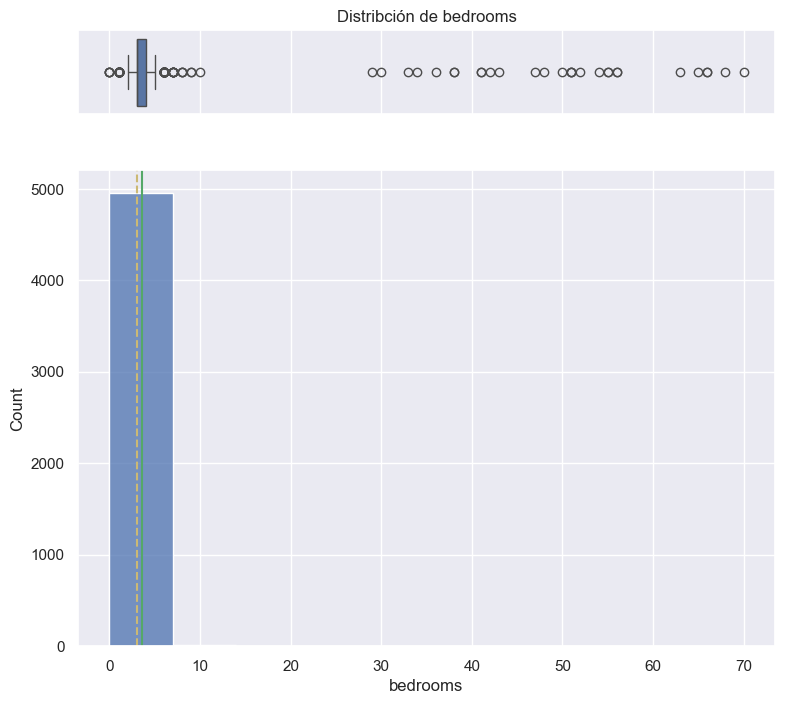

In [8]:
# Crear histograma y boxplot de bedrooms
histogram_boxplot(viviendas.bedrooms, bins = 10, font_scale=1, title="Distribción de bedrooms")

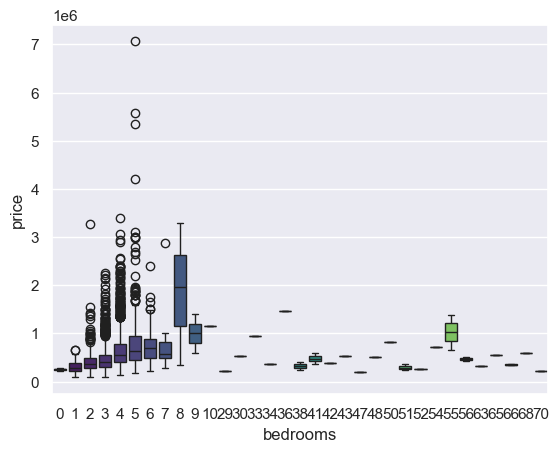

In [9]:
# Ver cruce de bedrooms con price
plt.clf()
sns.boxplot(x='bedrooms',y=viviendas.price,data=viviendas,palette='viridis') #np.log(viviendas.price)
plt.show()

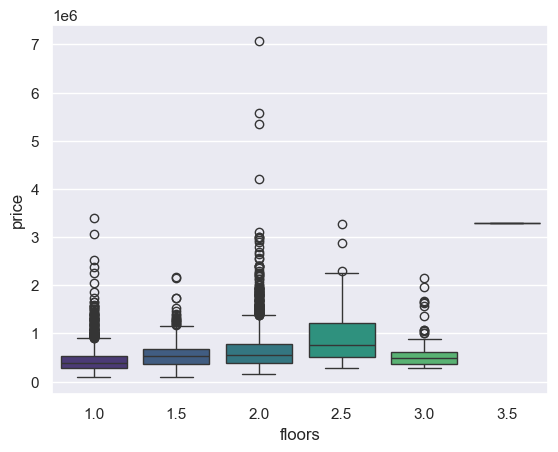

In [10]:
# Ver cruce de floors con price
plt.clf()
sns.boxplot(x='floors',y='price',data=viviendas,palette='viridis')
plt.show()

## Corrigir errores detectados

1. Errores en tipos de variables 
    + Variables *Luxury*, *basement*, *waterfront*, *view* y *Condition* son factores porque así se indica en la descripción del archivo.
    + Variables *bedrooms* y *bathrooms* podrían ser factores debido a su distribución. De momento se espera a recategorizar para pasar a factor.
    + Variable *floors* tiene solo 6 valores distintos, es factor.
    + Las variables *year* y *month* habría que convertir seguro la primera y tal vez la segunda...con esta última se puedes hacer el truco de mantenerla continua y crear un factor trimestres (nominal con 4 categorías).
2. Valores fuera de rango
    + Variable *sqf_lot* -> mínimo en -1...
    + Variable *waterfront* -> valor -1...
3. Missings no declarados
    + Variable *Condition* tiene una categoría '?'
4. Missings en el archivo bruto. No parece haber problema de valores perdidos.

In [11]:
# Lista de columnas con menos de 10 valores distintos. Potenciales factores!
to_factor = list(viviendas.loc[:,viviendas.nunique() < 10]);  

# Cambiar el tipo de todas ellas a factor de una vez
viviendas[to_factor] = viviendas[to_factor].astype('category')

In [ ]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          5000 non-null   category
 1   month         5000 non-null   int64   
 2   price         5000 non-null   int64   
 3   Luxury        5000 non-null   category
 4   bedrooms      5000 non-null   int64   
 5   bathrooms     5000 non-null   float64 
 6   sqft_living   5000 non-null   int64   
 7   sqft_lot      5000 non-null   int64   
 8   floors        5000 non-null   category
 9   waterfront    5000 non-null   category
 10  view          5000 non-null   category
 11  condition     5000 non-null   category
 12  sqft_above    5000 non-null   int64   
 13  basement      5000 non-null   category
 14  yr_built      5000 non-null   int64   
 15  yr_renovated  5000 non-null   int64   
 16  lat           5000 non-null   float64 
 17  long          5000 non-null   float64 
dtypes: categ

In [ ]:
viviendas.describe()

,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,lat,long
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,6.589400,5.441291e+05,3.624200,2.139500,2077.382000,1.373248e+04,1784.89840,1971.084200,86.157000,47.561237,-122.213915
std,3.120377,3.729869e+05,3.710165,0.867606,916.477607,3.758144e+04,824.33091,29.242444,405.523818,0.138218,0.140557
min,1.000000,8.650000e+04,0.000000,0.000000,370.000000,-1.000000e+00,370.00000,1900.000000,0.000000,47.155900,-122.505000
25%,4.000000,3.249375e+05,3.000000,1.500000,1410.000000,4.500000e+03,1190.00000,1951.000000,0.000000,47.475275,-122.330000
50%,6.000000,4.510000e+05,3.000000,2.500000,1910.000000,7.312000e+03,1550.00000,1975.000000,0.000000,47.574500,-122.226500
75%,9.000000,6.450000e+05,4.000000,2.500000,2560.000000,1.028425e+04,2220.00000,1996.000000,0.000000,47.678925,-122.124000
max,12.000000,7.062500e+06,70.000000,6.000000,10040.000000,1.164794e+06,7680.00000,2015.000000,2015.000000,47.777000,-121.352000


In [ ]:
viviendas.describe(exclude=np.number)

,year,Luxury,floors,waterfront,view,condition,basement
count,5000,5000,5000.0,5000,5000,5000,5000
unique,2,2,6.0,3,2,5,2
top,2014,0,1.0,0,0,B,0
freq,3416,2886,2463.0,4852,4509,3254,3044


## Inspección gráfica

Cat
Cont


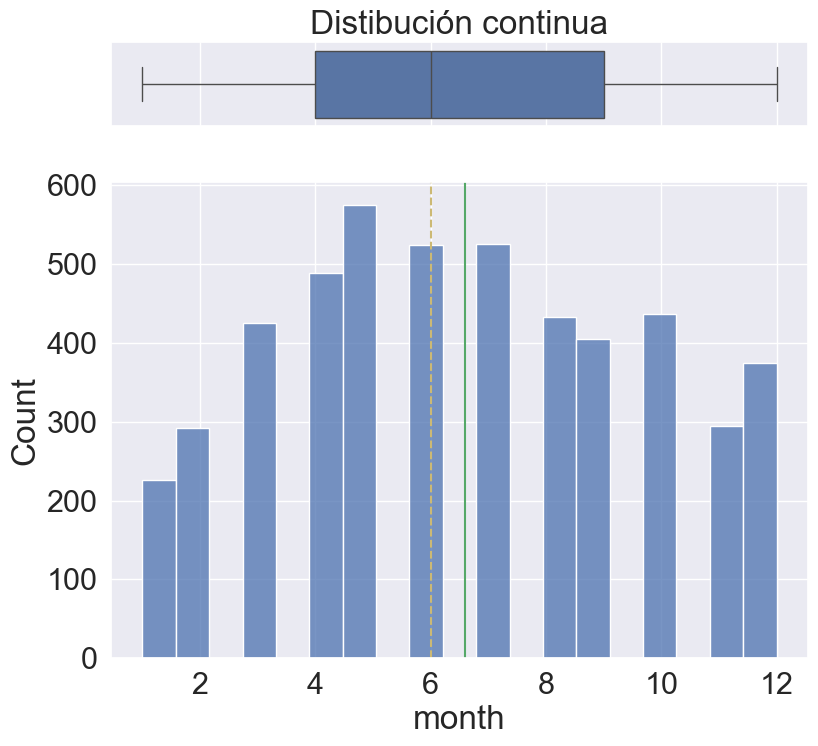

Cont


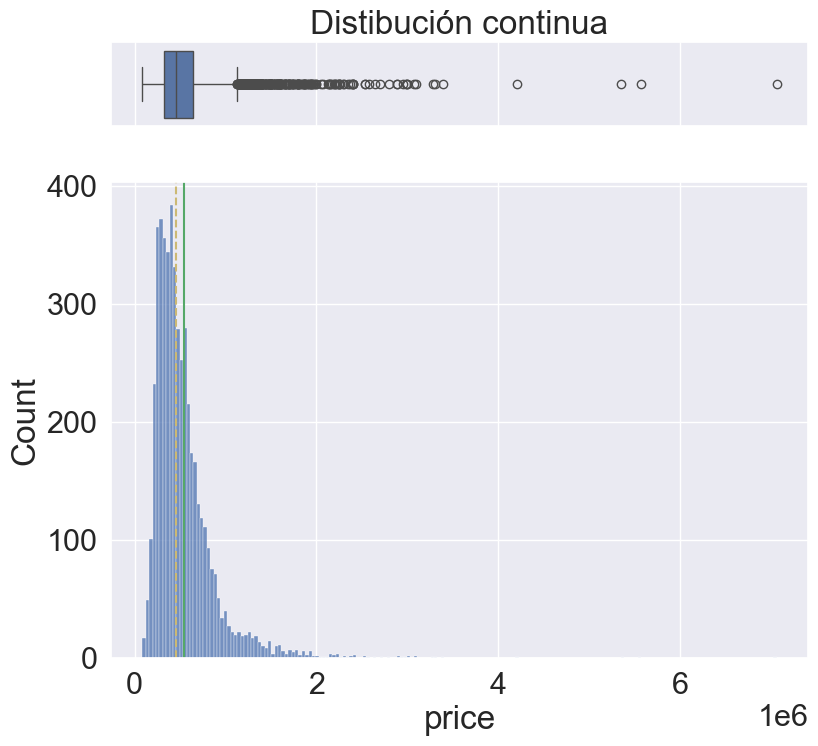

Cat
Cont


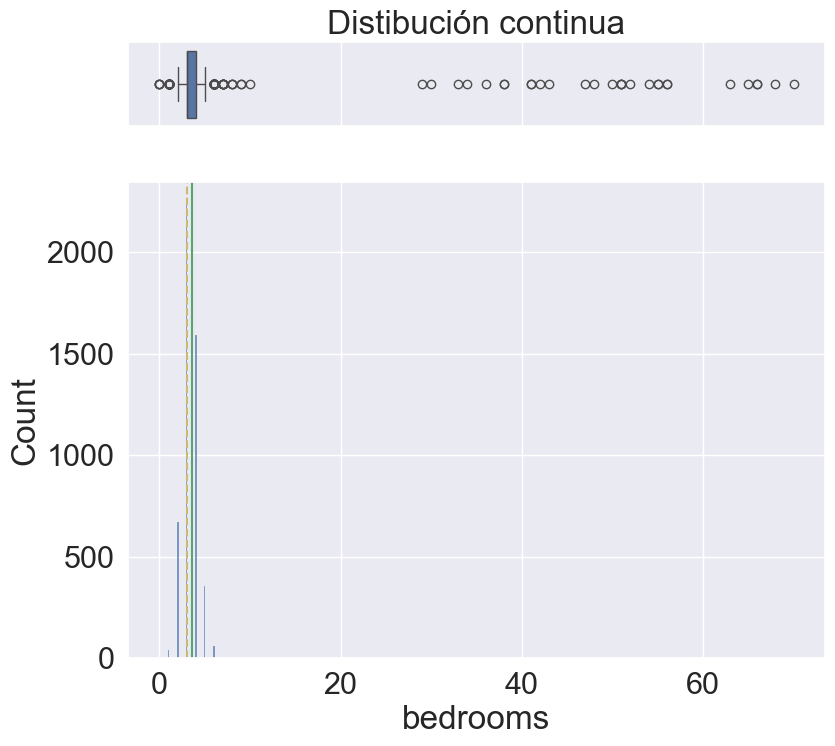

Cont


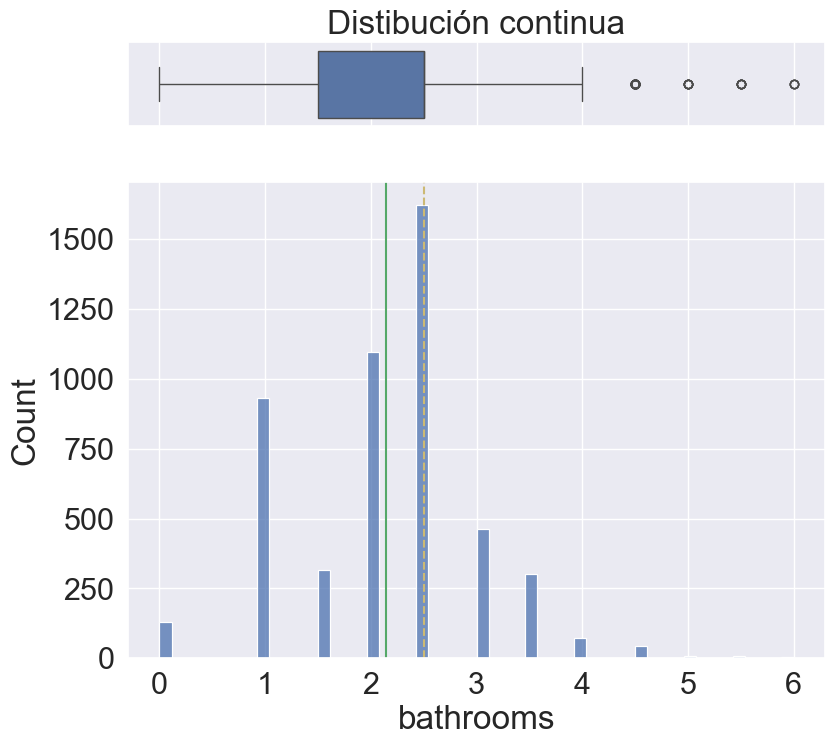

Cont


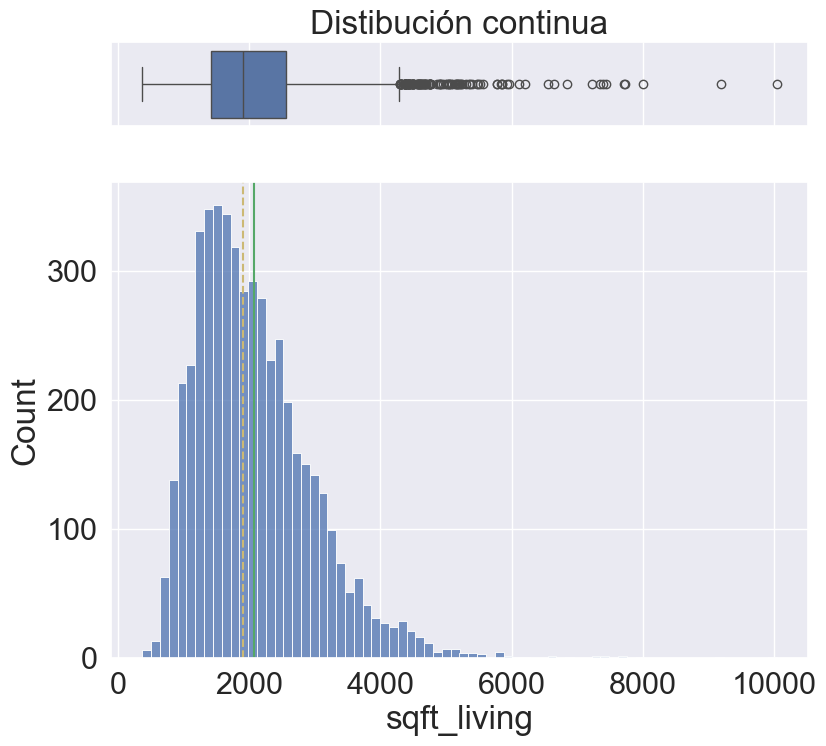

Cont


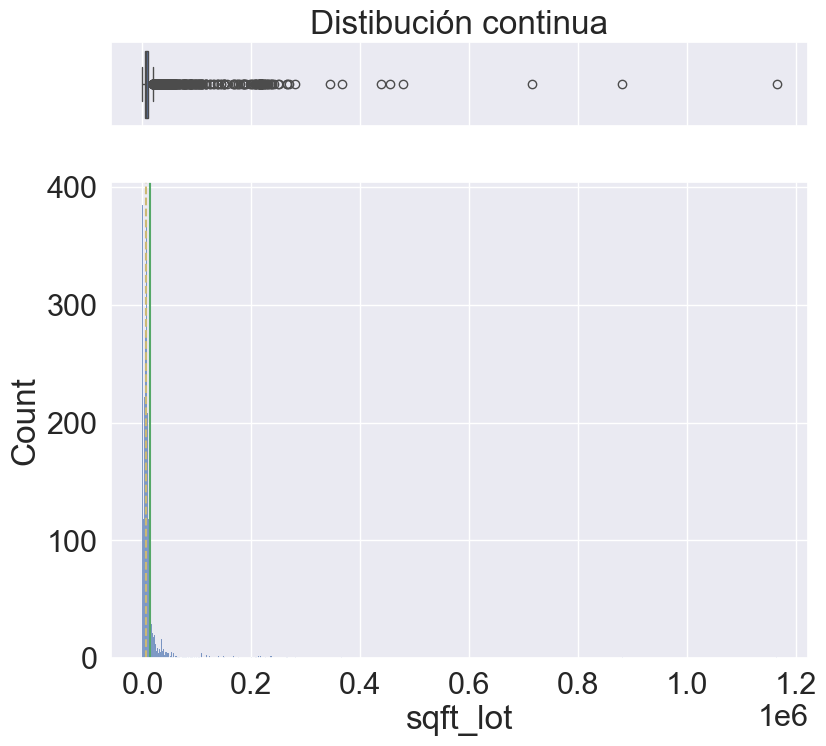

Cat
Cat
Cat
Cat
Cont


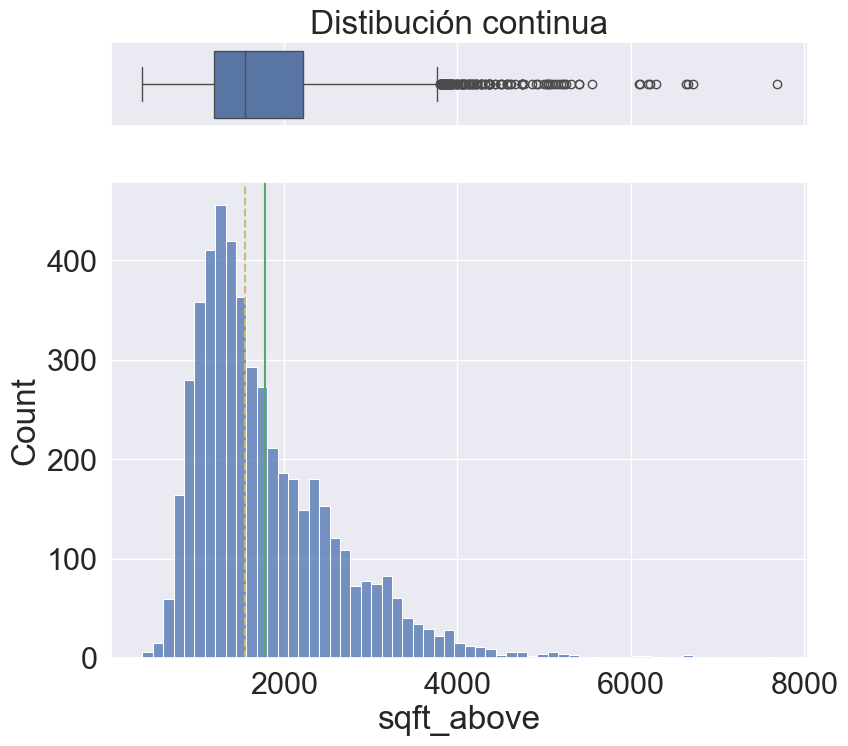

Cat
Cont


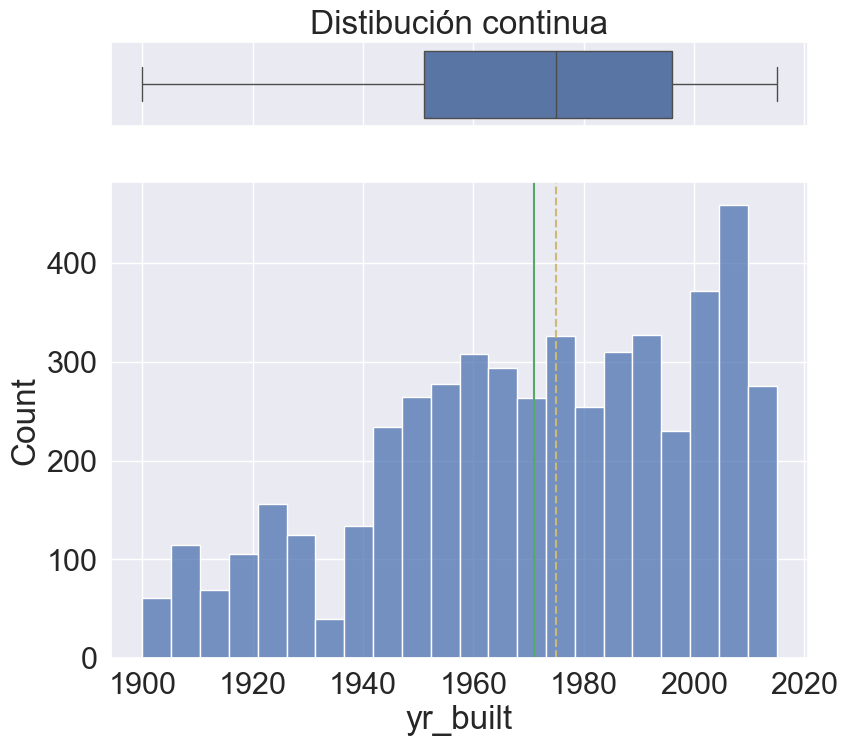

Cont


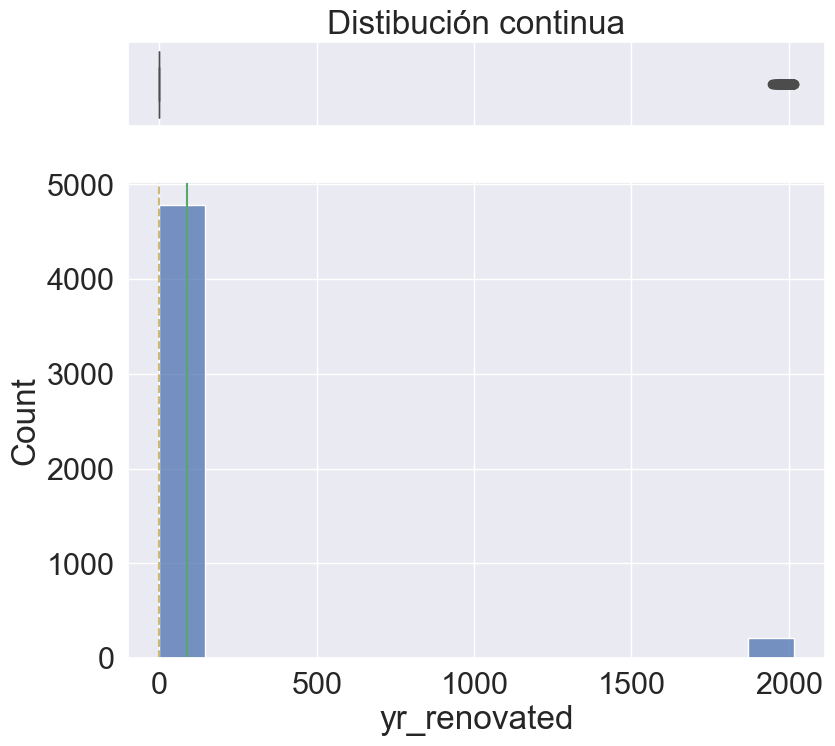

Cont


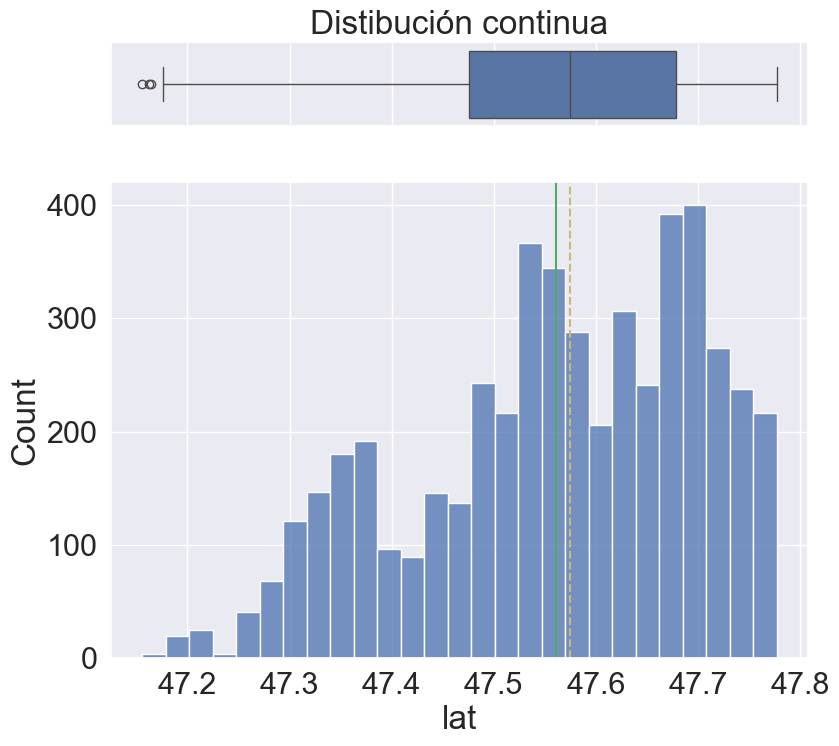

Cont


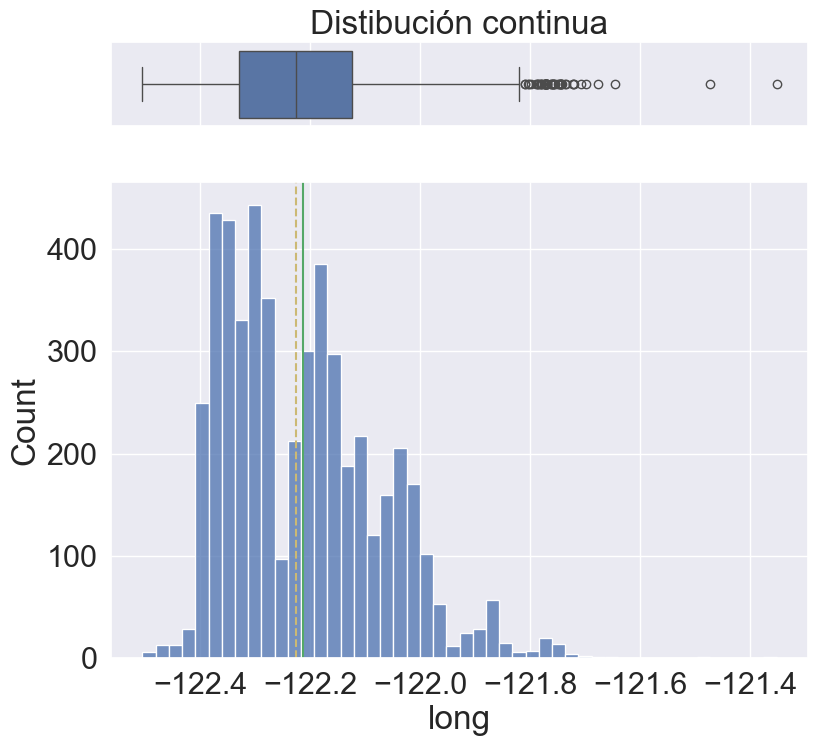

year            None
month           None
price           None
Luxury          None
bedrooms        None
bathrooms       None
sqft_living     None
sqft_lot        None
floors          None
waterfront      None
view            None
condition       None
sqft_above      None
basement        None
yr_built        None
yr_renovated    None
lat             None
long            None
dtype: object

In [15]:
viviendas.apply(plot)

In [16]:
# Ver las que tienen más de 10 en bedrooms
viviendas.loc[viviendas.bedrooms > 10,:]

,year,month,price,Luxury,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,basement,yr_built,yr_renovated,lat,long
16,2014,8,396500,0,42,1.5,1360,-1,2.0,0,0,B,1120,1,2003,0,47.6526,-122.384
42,2014,6,664950,1,55,3.0,3190,-1,1.0,0,1,B,1890,1,2013,0,47.5090,-122.240
182,2014,9,555000,1,65,3.0,2170,-1,1.0,0,0,B,1290,1,1977,0,47.6910,-122.113
300,2014,8,430000,0,56,2.0,1710,7724,1.0,0,0,B,1710,0,1983,0,47.7721,-122.293
650,2014,5,250000,0,51,1.0,1100,4373,1.0,0,0,?,820,1,1947,0,47.4653,-122.338
801,2014,9,585000,1,41,2.5,2370,15200,1.0,0,0,B,1660,1,1975,0,47.6295,-122.089
889,2014,12,370000,0,41,2.5,3230,35306,2.0,0,0,B,3230,0,1987,0,47.3065,-122.113
1056,2014,11,370000,0,66,3.0,2580,5511,2.0,0,0,B,2580,0,1999,0,47.4286,-122.185
1763,2014,9,228000,0,70,1.0,1190,9199,1.0,0,0,B,1190,0,1955,0,47.4258,-122.322
2078,2014,12,952000,1,33,0.0,2760,4500,2.0,0,0,B,2120,1,2004,0,47.6529,-122.372


In [17]:
# Copiar variable original
viviendas['bedrooms_cont'] = viviendas.bedrooms

# Transformar inplace sobre la copia
viviendas.loc[viviendas.bedrooms_cont > 10,'bedrooms_cont'] =np.nan

In [18]:
viviendas.bedrooms.value_counts()

bedrooms
3     2233
4     1592
2      671
5      357
6       58
1       42
7        8
0        4
8        3
51       3
56       2
55       2
41       2
66       2
9        2
38       2
47       1
34       1
43       1
63       1
30       1
50       1
68       1
70       1
52       1
48       1
54       1
10       1
29       1
33       1
65       1
42       1
36       1
Name: count, dtype: int64

In [19]:
viviendas.bedrooms_cont.value_counts()

bedrooms_cont
3.0     2233
4.0     1592
2.0      671
5.0      357
6.0       58
1.0       42
7.0        8
0.0        4
8.0        3
9.0        2
10.0       1
Name: count, dtype: int64

In [20]:
# Crear la variable en formato categórico

# Copiar variable original
viviendas['bedrooms_cat'] = viviendas.bedrooms
#viviendas.bedrooms = viviendas.bedrooms.astype('category')
viviendas.loc[viviendas.bedrooms > 6,'bedrooms_cat'] = '>6'
viviendas.loc[viviendas.bedrooms < 2,'bedrooms_cat'] = '<2'

# Convertir a categoría
viviendas.bedrooms_cat = viviendas.bedrooms_cat.astype('category')
viviendas['bedrooms_cat']=viviendas.bedrooms_cat.cat.reorder_categories(['<2',2,3,4,5,6,'>6'])

In [21]:
viviendas.bedrooms_cat.value_counts(sort=False)

bedrooms_cat
<2      46
2      671
3     2233
4     1592
5      357
6       58
>6      43
Name: count, dtype: int64

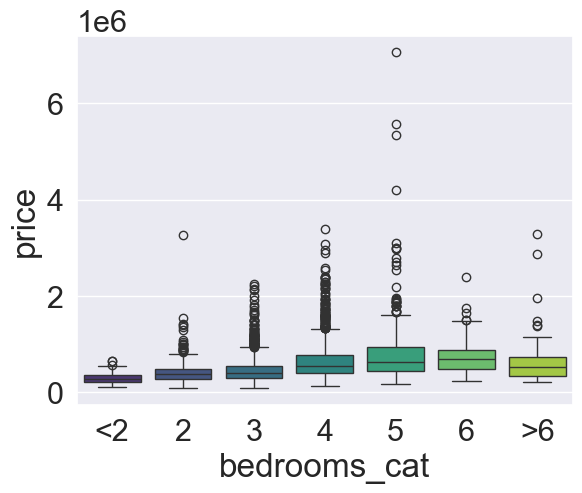

In [22]:
# Ver distribución de price vs betrooms_cat
plt.clf()
sns.boxplot(x='bedrooms_cat',y='price',data=viviendas,palette='viridis')
plt.show()

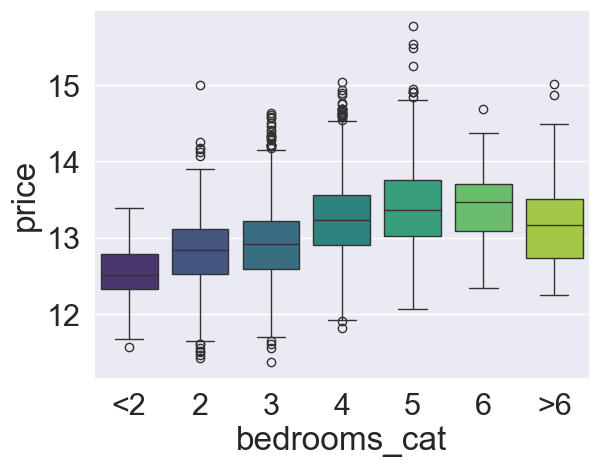

In [23]:
# Ver distribución de logarítmo de price vs betrooms_cat
plt.clf()
sns.boxplot(x=viviendas.bedrooms_cat,y=np.log(viviendas.price),palette='viridis')
plt.show()

In [24]:
# Variable sqft_lot se ve muy rara pues tiene máximo muy lejos y por otro lado los -1.

# Pasar a NaN todos los que son menores que 0
viviendas.loc[viviendas.sqft_lot < 0,'sqft_lot'] =np.nan

In [25]:
# Ver cómo que da variable
viviendas['sqft_lot'].describe()

count    4.618000e+03
mean     1.486851e+04
std      3.888862e+04
min      6.380000e+02
25%      5.048500e+03
50%      7.617500e+03
75%      1.074275e+04
max      1.164794e+06
Name: sqft_lot, dtype: float64

In [26]:
# Ver cuántos NaN hay en sqft_lot
viviendas['sqft_lot'].isna().sum()

382

In [27]:
# Comprobar el varor mínimo y máximo en sqft_lot
viviendas.sqft_lot.min(),viviendas.sqft_lot.max()

(638.0, 1164794.0)

In [28]:
# Ver viviendas con más de 500000 en sqft_lot
viviendas.loc[viviendas.sqft_lot > 500000,:] #=np.nan

,year,month,price,Luxury,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,basement,yr_built,yr_renovated,lat,long,bedrooms_cont,bedrooms_cat
3634,2015,4,750000,1,3,2.5,2350,715690.0,1.5,0,0,C,2350,0,1979,0,47.1622,-121.971,3.0,3
4453,2015,5,190000,0,2,1.0,710,1164794.0,1.0,0,0,?,710,0,1915,0,47.6888,-121.909,2.0,2
4831,2015,1,1650000,1,4,3.5,3920,881654.0,3.0,0,1,B,3920,0,2002,0,47.5385,-121.896,4.0,4


In [29]:
viviendas.sqft_lot.max()

1164794.0

Cont


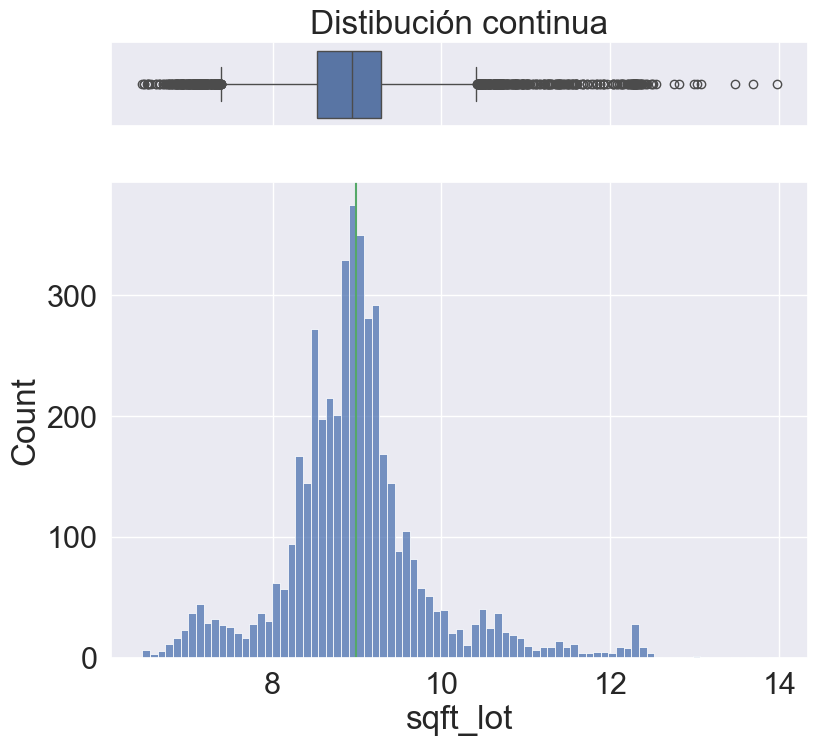

In [30]:
# Tasnformar la variable a logaritmo para ver si se centra un poco
plot(np.log(viviendas.sqft_lot))
plt.show()

In [31]:
# Crear la variable log_sqft_lot
viviendas['log_sqft_lot'] = np.log(viviendas.sqft_lot)

In [32]:
# Ver en la variable condition la frecuencia de las categorías de clasificación
print(viviendas.condition.value_counts())

condition
B    3254
C    1289
A     412
?      40
D       5
Name: count, dtype: int64


In [33]:
# Tabla de contingencia de condition con la variable objetivo binaria Luxury
pd.crosstab(index=viviendas['Luxury'], columns=viviendas['condition'], normalize='columns')

condition,?,A,B,C,D
Luxury,,,,,
0,0.85,0.495146,0.576214,0.597362,0.6
1,0.15,0.504854,0.423786,0.402638,0.4


In [34]:
# Reemplazar los ? por Deconocido pues representa una categoría importante en volumen y con un posible patrón interesante
viviendas.condition.replace('?','Desc',inplace=True)

In [35]:
# Unir categoría C y D
viviendas.condition.replace(['C','D'],'CD',inplace=True)

In [36]:
print(viviendas.condition.value_counts())

condition
B       3254
CD      1294
A        412
Desc      40
Name: count, dtype: int64


In [37]:
viviendas.describe()

,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,lat,long,bedrooms_cont,log_sqft_lot
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,4.618000e+03,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,4971.000000,4618.000000
mean,6.589400,5.441291e+05,3.624200,2.139500,2077.382000,1.486851e+04,1784.89840,1971.084200,86.157000,47.561237,-122.213915,3.357876,8.986030
std,3.120377,3.729869e+05,3.710165,0.867606,916.477607,3.888862e+04,824.33091,29.242444,405.523818,0.138218,0.140557,0.908748,0.904738
min,1.000000,8.650000e+04,0.000000,0.000000,370.000000,6.380000e+02,370.00000,1900.000000,0.000000,47.155900,-122.505000,0.000000,6.458338
25%,4.000000,3.249375e+05,3.000000,1.500000,1410.000000,5.048500e+03,1190.00000,1951.000000,0.000000,47.475275,-122.330000,3.000000,8.526846
50%,6.000000,4.510000e+05,3.000000,2.500000,1910.000000,7.617500e+03,1550.00000,1975.000000,0.000000,47.574500,-122.226500,3.000000,8.938204
75%,9.000000,6.450000e+05,4.000000,2.500000,2560.000000,1.074275e+04,2220.00000,1996.000000,0.000000,47.678925,-122.124000,4.000000,9.281986
max,12.000000,7.062500e+06,70.000000,6.000000,10040.000000,1.164794e+06,7680.00000,2015.000000,2015.000000,47.777000,-121.352000,10.000000,13.968055


In [38]:
# Ver en waterfront las frecuencias de las categorías de clasificación
print(viviendas.waterfront.value_counts())

waterfront
 0    4852
-1     106
 1      42
Name: count, dtype: int64


In [39]:
# Tabla de contingencia de waterfront con la variable objetivo binaria Luxury
pd.crosstab(index=viviendas['Luxury'], columns=viviendas['waterfront'], normalize='columns')

waterfront,-1,0,1
Luxury,,,
0,0.603774,0.580791,0.095238
1,0.396226,0.419209,0.904762


In [40]:
# Convertir los -1 en NaN
viviendas.waterfront.replace(-1,np.nan,inplace=True)

In [41]:
# Crea una variable categórica a partir de la variable “yr_renovated” que tome el valor 0 cuando la variable no haya sido renovada y 1, en otro caso
viviendas.loc[viviendas.yr_renovated > 0,'yr_renovated'] = '1'

In [42]:
viviendas.describe()

,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,bedrooms_cont,log_sqft_lot
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,4.618000e+03,5000.00000,5000.000000,5000.000000,5000.000000,4971.000000,4618.000000
mean,6.589400,5.441291e+05,3.624200,2.139500,2077.382000,1.486851e+04,1784.89840,1971.084200,47.561237,-122.213915,3.357876,8.986030
std,3.120377,3.729869e+05,3.710165,0.867606,916.477607,3.888862e+04,824.33091,29.242444,0.138218,0.140557,0.908748,0.904738
min,1.000000,8.650000e+04,0.000000,0.000000,370.000000,6.380000e+02,370.00000,1900.000000,47.155900,-122.505000,0.000000,6.458338
25%,4.000000,3.249375e+05,3.000000,1.500000,1410.000000,5.048500e+03,1190.00000,1951.000000,47.475275,-122.330000,3.000000,8.526846
50%,6.000000,4.510000e+05,3.000000,2.500000,1910.000000,7.617500e+03,1550.00000,1975.000000,47.574500,-122.226500,3.000000,8.938204
75%,9.000000,6.450000e+05,4.000000,2.500000,2560.000000,1.074275e+04,2220.00000,1996.000000,47.678925,-122.124000,4.000000,9.281986
max,12.000000,7.062500e+06,70.000000,6.000000,10040.000000,1.164794e+06,7680.00000,2015.000000,47.777000,-121.352000,10.000000,13.968055


In [43]:
viviendas.describe(exclude=np.number)

,year,Luxury,floors,waterfront,view,condition,basement,yr_renovated,bedrooms_cat
count,5000,5000,5000.0,4894,5000,5000,5000,5000,5000
unique,2,2,6.0,2,2,4,2,2,7
top,2014,0,1.0,0,0,B,0,0,3
freq,3416,2886,2463.0,4852,4509,3254,3044,4784,2233


In [44]:
# Indicar la variableObj, el ID y las Input 
# los atípicos y los missings se gestionan sólo de las input
varObjCont = viviendas.price
varObjBin = viviendas.Luxury
imput = viviendas.drop(['price','Luxury'],axis=1)

imput.head()

,year,month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,basement,yr_built,yr_renovated,lat,long,bedrooms_cont,bedrooms_cat,log_sqft_lot
0,2014,7,3,2.5,2070,NaN,1.0,0,0,CD,1540,1,1980,0,47.5936,-122.013,3.0,3,NaN
1,2014,6,2,1.5,1640,NaN,1.5,0,0,A,1540,1,1916,0,47.6624,-122.325,2.0,2,NaN
2,2014,10,4,3.5,3720,NaN,1.0,0,1,B,3720,0,2007,0,47.3216,-121.940,4.0,4,NaN
3,2014,12,3,3.5,2260,NaN,2.0,0,0,B,1880,1,2003,0,47.6422,-122.361,3.0,3,NaN
4,2014,10,3,2.0,2050,NaN,1.0,0,0,A,1170,1,1960,0,47.7447,-122.328,3.0,3,NaN


## Valores atípicos

In [45]:
# Ver las asimetrías de las variables numéricas. Asimetrías en valor absoluto mayores a la unidad son signo de distribución significativamente sesgada a la derecha/positiva (+) o izquierda/negativa (-). 
imput.select_dtypes(include=np.number).apply(lambda x: x.skew())

month             0.069568
bedrooms         12.916180
bathrooms         0.035777
sqft_living       1.404513
sqft_lot         12.669925
sqft_above        1.414411
yr_built         -0.465003
lat              -0.511038
long              0.796275
bedrooms_cont     0.516756
log_sqft_lot      0.905476
dtype: float64

## Gestión de outliers

In [46]:
# Llamada gestiona_outliers en modo check
imput.select_dtypes(include=np.number).copy().apply(lambda x: gestiona_outliers(x))

month
bedrooms
bathrooms
sqft_living
sqft_lot
sqft_above
yr_built
lat
long
bedrooms_cont
log_sqft_lot


,month,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,bedrooms_cont,log_sqft_lot
0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0000,0.000000
1,0.0,0.58,0.08,0.24,0.0,0.24,0.0,0.0,0.04,0.1207,1.840624
2,0.0,0.58,0.08,0.24,0.0,0.24,0.0,0.0,0.04,0.1207,1.840624


In [47]:
# Crear copia para evitar pisar información
vinCont = imput.select_dtypes(include=np.number).copy()

# Aplicar la gestión de outliers en modelo winsor
viviendas_winsor = vinCont.apply(lambda x: gestiona_outliers(x,clas='winsor'))

month
bedrooms
bathrooms
sqft_living
sqft_lot
sqft_above
yr_built
lat
long
bedrooms_cont
log_sqft_lot


In [48]:
# Juntar columnas con join
imput_wins = viviendas_winsor.join(imput.select_dtypes(exclude=np.number))
imput_wins.describe()

,month,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,bedrooms_cont,log_sqft_lot
count,5000.000000,5000.000000,5000.000000,5000.000000,4.618000e+03,5000.000000,5000.000000,5000.000000,5000.000000,4971.000000,4618.000000
mean,6.589400,3.506600,2.139500,2074.678000,1.486851e+04,1782.865800,1971.084200,47.561237,-122.213939,3.357071,8.975639
std,3.120377,2.147855,0.867606,900.212366,3.888862e+04,813.746335,29.242444,0.138218,0.140419,0.903959,0.867779
min,1.000000,0.000000,0.000000,370.000000,6.380000e+02,370.000000,1900.000000,47.155900,-122.505000,0.000000,6.458338
25%,4.000000,3.000000,1.500000,1410.000000,5.048500e+03,1190.000000,1951.000000,47.475275,-122.330000,3.000000,8.526846
50%,6.000000,3.000000,2.500000,1910.000000,7.617500e+03,1550.000000,1975.000000,47.574500,-122.226500,3.000000,8.938204
75%,9.000000,4.000000,2.500000,2560.000000,1.074275e+04,2220.000000,1996.000000,47.678925,-122.124000,4.000000,9.281986
max,12.000000,29.000000,6.000000,6550.000000,1.164794e+06,5400.000000,2015.000000,47.777000,-121.473000,8.000000,11.725695


In [49]:
imput_wins.describe(exclude=np.number)

,year,floors,waterfront,view,condition,basement,yr_renovated,bedrooms_cat
count,5000,5000.0,4894,5000,5000,5000,5000,5000
unique,2,6.0,2,2,4,2,2,7
top,2014,1.0,0,0,B,0,0,3
freq,3416,2463.0,4852,4509,3254,3044,4784,2233


## Valores perdidos

In [50]:
#Proporción de missings por variable 
imput_wins.apply(lambda x: x.isna().sum()/imput_wins.shape[0]*100)

month            0.00
bedrooms         0.00
bathrooms        0.00
sqft_living      0.00
sqft_lot         7.64
sqft_above       0.00
yr_built         0.00
lat              0.00
long             0.00
bedrooms_cont    0.58
log_sqft_lot     7.64
year             0.00
floors           0.00
waterfront       2.12
view             0.00
condition        0.00
basement         0.00
yr_renovated     0.00
bedrooms_cat     0.00
dtype: float64

In [51]:
# Proporción de missings por observación (como una nueva columna del dataset)
imput_wins['prop_missings'] = imput_wins.apply(lambda x: x.isna().sum()/imput_wins.shape[1]*100,axis=1)

# Valor distribución
imput_wins.prop_missings.describe()

count    5000.000000
mean        0.946316
std         2.933870
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        15.789474
Name: prop_missings, dtype: float64

In [52]:
# Ordenar el archivo por la nueva variable creada para ver el aspecto
imput_wins.sort_values(by='prop_missings', ascending=False).head()

,month,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,bedrooms_cont,log_sqft_lot,year,floors,waterfront,view,condition,basement,yr_renovated,bedrooms_cat,prop_missings
232,5,2,1.5,1110,NaN,930,2005,47.6319,-122.362,2.0,NaN,2014,2.0,NaN,0,B,1,0,2,15.789474
182,9,29,3.0,2170,NaN,1290,1977,47.6910,-122.113,NaN,NaN,2014,1.0,0,0,B,1,0,>6,15.789474
93,8,3,1.0,1050,NaN,930,1920,47.5402,-122.380,3.0,NaN,2014,1.0,NaN,0,B,1,0,3,15.789474
3421,4,29,3.0,2910,NaN,1800,1970,47.6939,-122.391,NaN,NaN,2015,1.0,0,0,A,1,0,>6,15.789474
3462,3,3,2.5,1620,NaN,1620,2002,47.4491,-122.120,3.0,NaN,2015,2.0,NaN,0,B,0,0,3,15.789474


## Coexistencia y patrones de missings

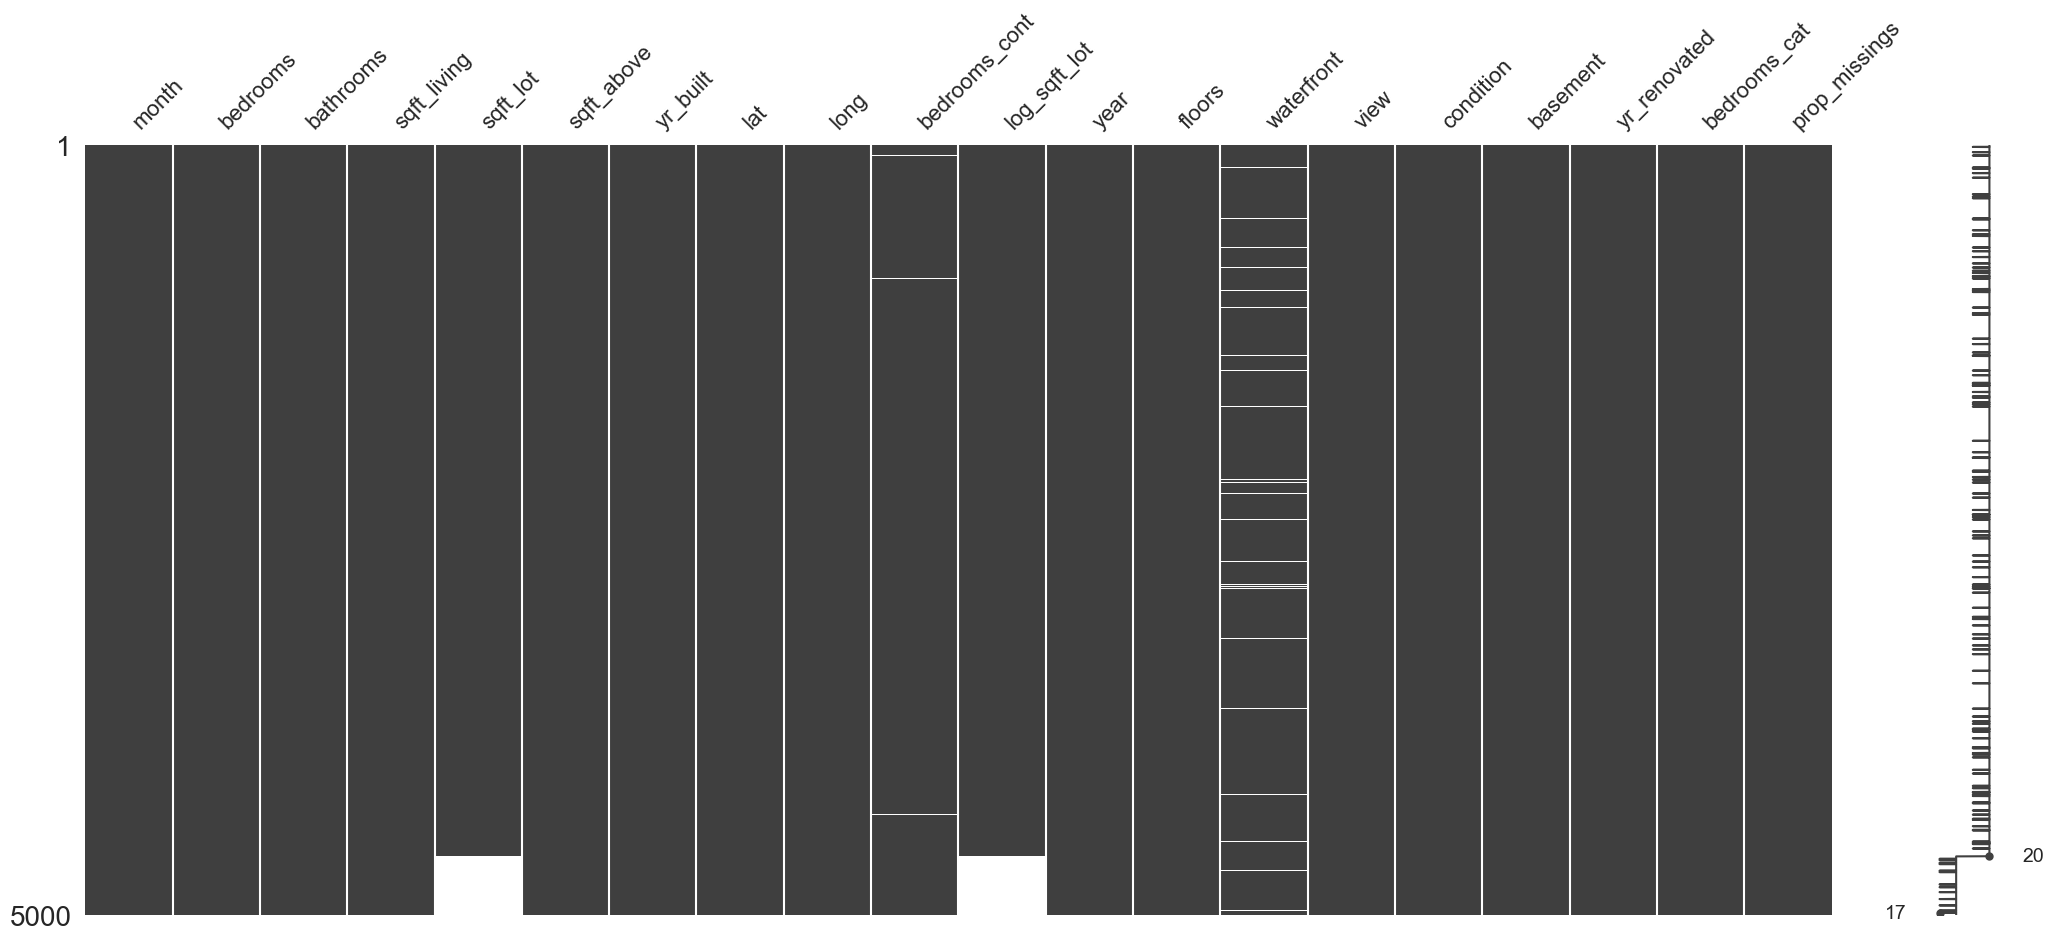

In [ ]:
#conda config --add channels conda-forge
#conda install missingno
# pip install missingno
import missingno as msno   

# Plot correlation heatmap of missingness
msno.matrix(imput_wins.sort_values(by='sqft_lot'))
plt.show()

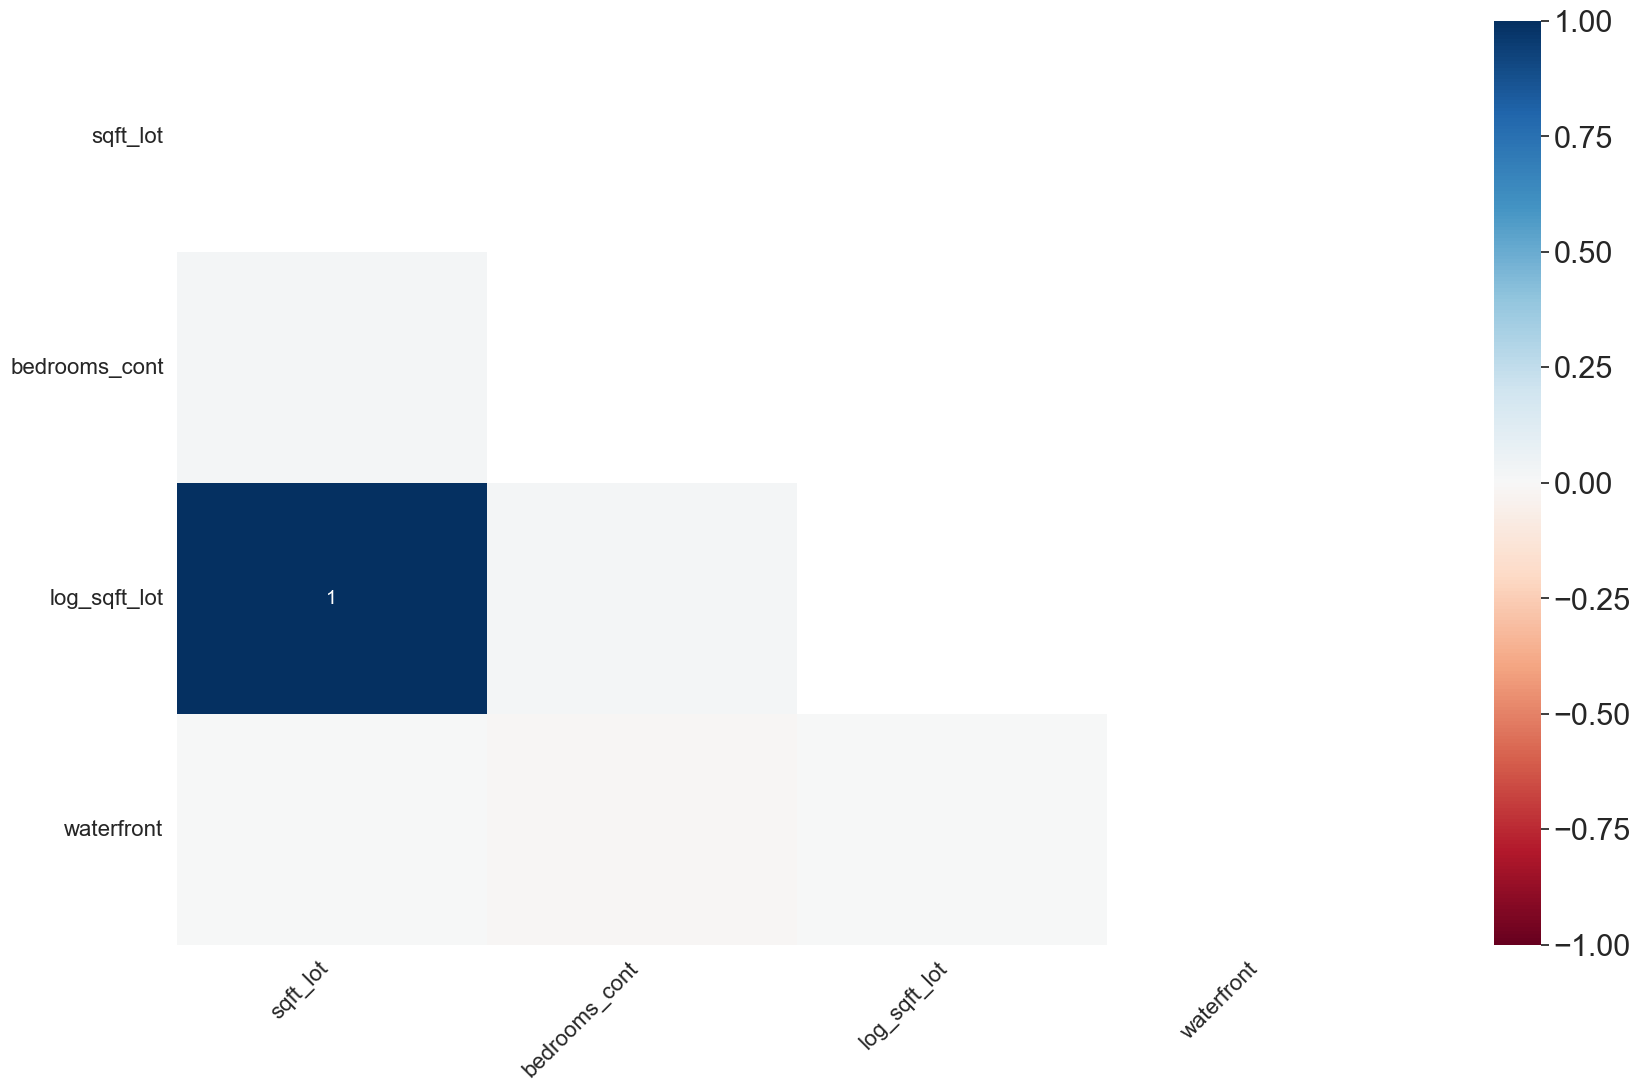

In [55]:
# Ver en el mapa de calor
msno.heatmap(imput_wins)
plt.show()

## Imputaciones

In [ ]:
# Ver cuántas observaciones se perderían si se eliminan los NAs.
imput_wins.dropna().describe()

# Quedan 4469 registros en total para todas las variable, se pierde el 11%, por lo que es mejor imputar

,month,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,bedrooms_cont,log_sqft_lot,prop_missings
count,4496.000000,4496.000000,4496.000000,4496.000000,4.496000e+03,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.0
mean,6.563167,3.358763,2.141125,2073.132340,1.483649e+04,1785.184831,1971.129448,47.561582,-122.214122,3.358096,8.973139,0.0
std,3.117501,0.908043,0.869801,898.505331,3.913706e+04,811.791339,29.220061,0.137876,0.140170,0.904010,0.865003,0.0
min,1.000000,0.000000,0.000000,370.000000,6.380000e+02,370.000000,1900.000000,47.155900,-122.505000,0.000000,6.458338,0.0
25%,4.000000,3.000000,1.500000,1410.000000,5.049500e+03,1200.000000,1952.000000,47.477225,-122.329250,3.000000,8.527044,0.0
50%,6.000000,3.000000,2.500000,1910.000000,7.615000e+03,1560.000000,1975.000000,47.574700,-122.227000,3.000000,8.937875,0.0
75%,9.000000,4.000000,2.500000,2560.000000,1.072000e+04,2230.000000,1996.000000,47.679125,-122.125000,4.000000,9.279866,0.0
max,12.000000,10.000000,6.000000,6550.000000,1.164794e+06,5400.000000,2015.000000,47.777000,-121.473000,8.000000,11.725695,0.0


In [57]:
import sklearn.impute as skl_imp
from sklearn.experimental import enable_iterative_imputer
# Moda: Solo nominales
imputer_moda = skl_imp.SimpleImputer(strategy='most_frequent', missing_values=np.nan)
# knn: Solo numéricas
imputer_knn = skl_imp.KNNImputer(n_neighbors=3)
# Chain equations: solo numéricas
imputer_itImp = skl_imp.IterativeImputer(max_iter=10, random_state=0)

import feature_engine.imputation as fe_imp
# Aleatoria: numéricas y nominales
imputer_rand = fe_imp.RandomSampleImputer()
# Mediana: solo numéricas
imputer_median = fe_imp.MeanMedianImputer(imputation_method='median')
# Media: solo nominales
imputer_mean = fe_imp.MeanMedianImputer(imputation_method='mean')

In [58]:
# Separar el dataset de nuevo en continuas y categóricas para aplicar los métodos que correspondan
imput_wins_cont = imput_wins.select_dtypes(include=np.number)
imput_wins_cat = imput_wins.select_dtypes(exclude=np.number)
imput_wins.yr_renovated.value_counts()

yr_renovated
0    4784
1     216
Name: count, dtype: int64

### Posibilidades para las numéricas:

Nivel **univariante**

In [59]:
# Media
viviendas_winsor_mean_imputed = imputer_mean.fit(imput_wins_cont).transform(imput_wins_cont)
# Mediana
viviendas_winsor_median_imputed = imputer_median.fit(imput_wins_cont).transform(imput_wins_cont)

Nivel **multivariante**

In [60]:
# Fit/transform
imput_wins_knn_imputed = pd.DataFrame(imputer_knn.fit_transform(imput_wins_cont),columns=imput_wins_cont.columns)
imput_wins_itImp_imputed = pd.DataFrame(imputer_itImp.fit_transform(imput_wins_cont),columns=imput_wins_cont.columns)


### Posibilidades para las nominales:

In [61]:
# Moda
imput_wins_moda_imputed = pd.DataFrame(imputer_moda.fit_transform(imput_wins_cat),columns=imput_wins_cat.columns)
imput_wins_moda_imputed.describe(exclude=np.number)

,year,floors,waterfront,view,condition,basement,yr_renovated,bedrooms_cat
count,5000,5000.0,5000,5000,5000,5000,5000,5000
unique,2,6.0,2,2,4,2,2,7
top,2014,1.0,0,0,B,0,0,3
freq,3416,2463.0,4958,4509,3254,3044,4784,2233


In [62]:
# Random a nivel general
imput_wins_rand_imputed = imputer_rand.fit(imput_wins).transform(imput_wins)
imput_wins_rand_imputed.describe()

,month,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,bedrooms_cont,log_sqft_lot,prop_missings
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,6.589400,3.506600,2.139500,2074.678000,1.479786e+04,1782.865800,1971.084200,47.561237,-122.213939,3.357200,8.972237,0.946316
std,3.120377,2.147855,0.867606,900.212366,3.821217e+04,813.746335,29.242444,0.138218,0.140419,0.904086,0.861799,2.933870
min,1.000000,0.000000,0.000000,370.000000,6.380000e+02,370.000000,1900.000000,47.155900,-122.505000,0.000000,6.458338,0.000000
25%,4.000000,3.000000,1.500000,1410.000000,5.040000e+03,1190.000000,1951.000000,47.475275,-122.330000,3.000000,8.526747,0.000000
50%,6.000000,3.000000,2.500000,1910.000000,7.614500e+03,1550.000000,1975.000000,47.574500,-122.226500,3.000000,8.937875,0.000000
75%,9.000000,4.000000,2.500000,2560.000000,1.074500e+04,2220.000000,1996.000000,47.678925,-122.124000,4.000000,9.279866,0.000000
max,12.000000,29.000000,6.000000,6550.000000,1.164794e+06,5400.000000,2015.000000,47.777000,-121.473000,8.000000,11.725695,15.789474


In [63]:
imput_wins_rand_imputed.describe(exclude=np.number)

,year,floors,waterfront,view,condition,basement,yr_renovated,bedrooms_cat
count,5000,5000.0,5000,5000,5000,5000,5000,5000
unique,2,6.0,2,2,4,2,2,7
top,2014,1.0,0,0,B,0,0,3
freq,3416,2463.0,4956,4509,3254,3044,4784,2233


# Toma de decisiones y guardado del archivo depurado

Se elege la gestión de outliers por winsor y la imputación por algún método multi

In [65]:
# Ejemplo de creación del data depurado con la configuración seleccionada knn+moda
viviendas_wins_itImp_moda = pd.concat([imput_wins_itImp_imputed,imput_wins_moda_imputed,varObjCont,varObjBin], axis=1)
viviendas_wins_itImp_moda.describe(include='all')

# Guardar archivo
viviendas_wins_itImp_moda.to_csv(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MINERÍA DE DATOS Y MODELACIÓN ejercicios\2. Ejercicio base datos vivienda\DatosViviendasDep_wins_itImp_moda.csv')

In [66]:
viviendas_wins_itImp_moda.head()

,month,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,bedrooms_cont,log_sqft_lot,prop_missings,year,floors,waterfront,view,condition,basement,yr_renovated,bedrooms_cat,price,Luxury
0,7.0,3.0,2.5,2070.0,13386.949854,1540.0,1980.0,47.5936,-122.013,3.0,9.182077,10.526316,2014,1.0,0,0,CD,1,0,3,653450,1
1,6.0,2.0,1.5,1640.0,12756.992143,1540.0,1916.0,47.6624,-122.325,2.0,9.042871,10.526316,2014,1.5,0,0,A,1,0,2,710000,1
2,10.0,4.0,3.5,3720.0,29172.702474,3720.0,2007.0,47.3216,-121.940,4.0,9.993406,10.526316,2014,1.0,0,1,B,0,0,4,780000,1
3,12.0,3.0,3.5,2260.0,15707.597076,1880.0,2003.0,47.6422,-122.361,3.0,8.386471,10.526316,2014,2.0,0,0,B,1,0,3,795000,1
4,10.0,3.0,2.0,2050.0,11165.954458,1170.0,1960.0,47.7447,-122.328,3.0,8.718566,10.526316,2014,1.0,0,0,A,1,0,3,399950,0


In [67]:
viviendas_wins_itImp_moda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   month          5000 non-null   float64 
 1   bedrooms       5000 non-null   float64 
 2   bathrooms      5000 non-null   float64 
 3   sqft_living    5000 non-null   float64 
 4   sqft_lot       5000 non-null   float64 
 5   sqft_above     5000 non-null   float64 
 6   yr_built       5000 non-null   float64 
 7   lat            5000 non-null   float64 
 8   long           5000 non-null   float64 
 9   bedrooms_cont  5000 non-null   float64 
 10  log_sqft_lot   5000 non-null   float64 
 11  prop_missings  5000 non-null   float64 
 12  year           5000 non-null   object  
 13  floors         5000 non-null   object  
 14  waterfront     5000 non-null   object  
 15  view           5000 non-null   object  
 16  condition      5000 non-null   object  
 17  basement       5000 non-null   ob

Listos los datos depurados para poder empezar con el modelado. A la hora de modelar utilizar este nuevo conjunto **datosViviendasDep_metodos**
